In [18]:
import pandas as pd

df = pd.read_excel('QVI_results.xlsx')

df.info()
df.drop(columns=['MOIS'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   MOIS              1564 non-null    float64       
 2   STORE_NBR         264836 non-null  int64         
 3   LYLTY_CARD_NBR    264836 non-null  int64         
 4   LIFESTAGE         264836 non-null  object        
 5   PREMIUM_CUSTOMER  264836 non-null  object        
 6   TXN_ID            264836 non-null  int64         
 7   PROD_NBR          264836 non-null  int64         
 8   PROD_NAME         264836 non-null  object        
 9   BRAND             264836 non-null  object        
 10  SIZE              264836 non-null  object        
 11  PRODUCT           264836 non-null  object        
 12  PROD_QTY          264836 non-null  int64         
 13  TOT_SALES         264836 non-null  float64       
dtypes: d

In [19]:
# 1. Data Understanding and Inspection
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# 2. Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Remove duplicates if any
df_cleaned = df.drop_duplicates()
print("\nShape after removing duplicates:", df_cleaned.shape)


Dataset Shape: (264836, 13)

First few rows of the dataset:
        DATE  STORE_NBR  LYLTY_CARD_NBR               LIFESTAGE  \
0 2018-10-17          1            1000   YOUNG SINGLES/COUPLES   
1 2019-05-14          1            1307  MIDAGE SINGLES/COUPLES   
2 2019-05-20          1            1343  MIDAGE SINGLES/COUPLES   
3 2018-08-17          2            2373  MIDAGE SINGLES/COUPLES   
4 2018-08-18          2            2426  MIDAGE SINGLES/COUPLES   

  PREMIUM_CUSTOMER  TXN_ID  PROD_NBR  \
0          Premium       1         5   
1           Budget     348        66   
2           Budget     383        61   
3           Budget     974        69   
4           Budget    1038       108   

                                  PROD_NAME    BRAND  SIZE       PRODUCT  \
0    Natural Chip        Compny SeaSalt175g  NATURAL  175G  NATURAL 175G   
1                  CCs Nacho Cheese    175g  CCS NAC  175G  CCS NAC 175G   
2    Smiths Crinkle Cut  Chips Chicken 170g  SMITHS   170G  SMITHS  

In [ ]:
# Examine data 
## has been done beforehand, now data is cleaned and ready for analysis

## Some notes about the stakeholders demand : 
# The client is particularly interested in customer segments and their chip purchasing behaviour




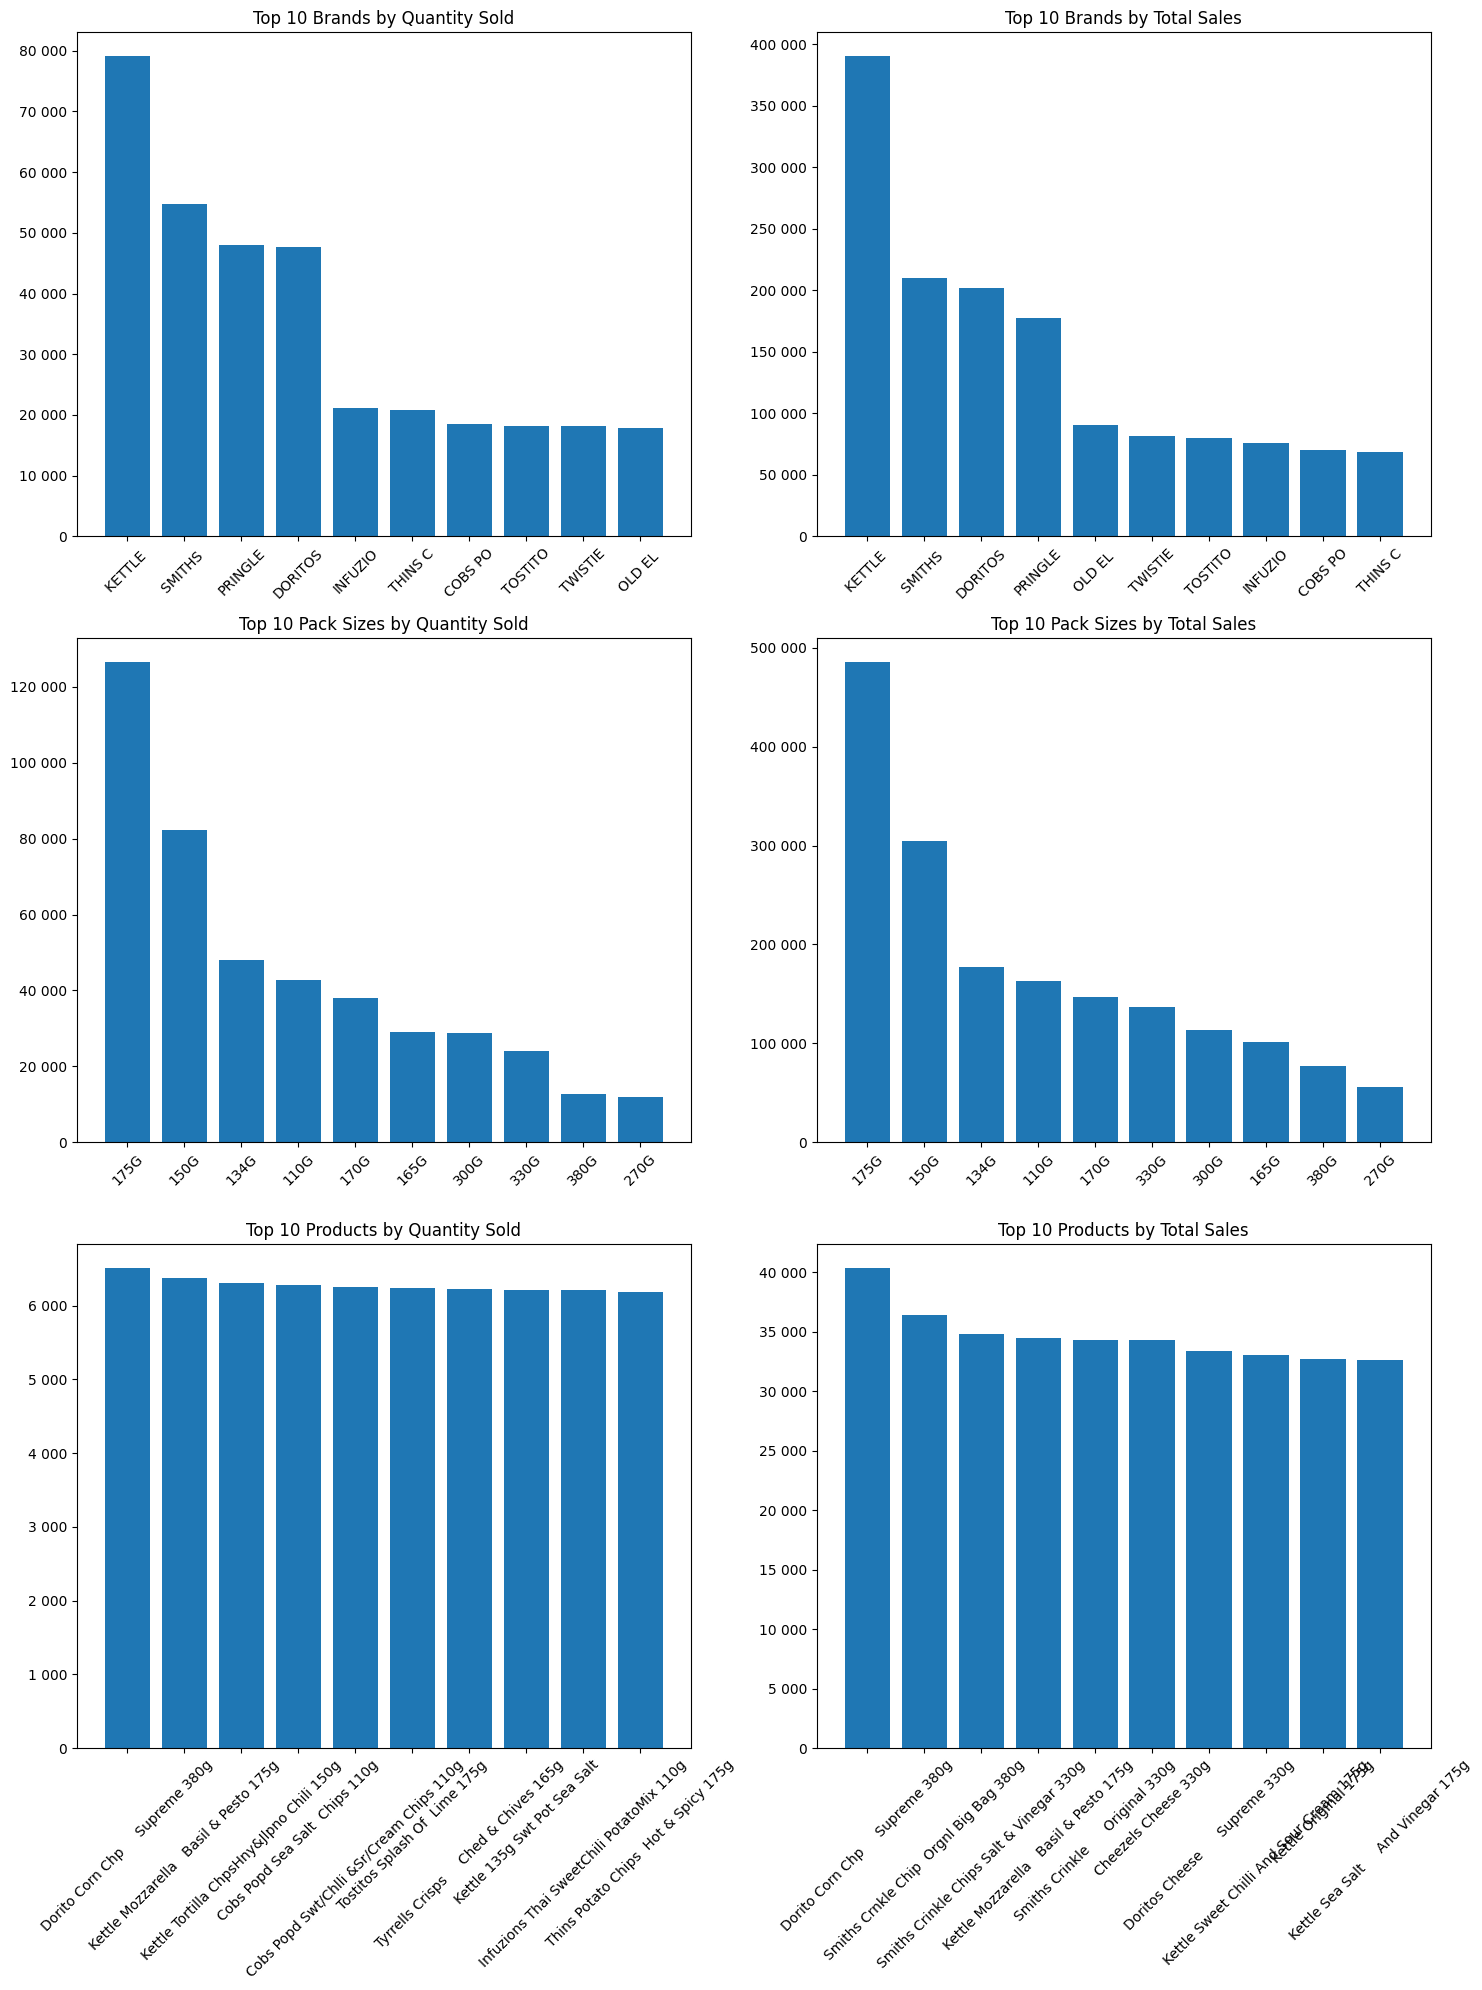


Top 10 Brands by Quantity and Sales:
      BRAND  PROD_QTY  TOT_SALES
14  KETTLE      79051   390239.8
29  SMITHS      54730   210076.8
18  PRINGLE     48019   177655.5
8   DORITOS     47707   201538.9
12  INFUZIO     21119    76247.6
32  THINS C     20744    68442.0
6   COBS PO     18571    70569.8
34  TOSTITO     18134    79789.6
35  TWISTIE     18118    81522.1
17  OLD EL      17805    90785.1


      BRAND  PROD_QTY  TOT_SALES
14  KETTLE      79051   390239.8
29  SMITHS      54730   210076.8
8   DORITOS     47707   201538.9
18  PRINGLE     48019   177655.5
17  OLD EL      17805    90785.1
35  TWISTIE     18118    81522.1
34  TOSTITO     18134    79789.6
12  INFUZIO     21119    76247.6
6   COBS PO     18571    70569.8
32  THINS C     20744    68442.0

Top 10 Pack Sizes by Quantity and Sales:
    SIZE  PROD_QTY  TOT_SALES
9   175G    126467   485437.4
5   150G     82174   304288.5
4   134G     48019   177655.5
2   110G     42835   162765.4
8   170G     38088   146673.0
7   165G    

In [21]:
# Data Analysis and customer segmentation
# Sales drivers

## Reminder to pretty number in y axis : add space in the number
# Group by Brand
brand_sales = df.groupby('BRAND').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'
}).reset_index()

# Sort by quantity and sales
brand_qty_top10 = brand_sales.sort_values('PROD_QTY', ascending=False).head(10)
brand_sales_top10 = brand_sales.sort_values('TOT_SALES', ascending=False).head(10)

# Group by Size 
size_sales = df.groupby('SIZE').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'
}).reset_index()

# Sort by quantity and sales
size_qty_top10 = size_sales.sort_values('PROD_QTY', ascending=False).head(10)
size_sales_top10 = size_sales.sort_values('TOT_SALES', ascending=False).head(10)

# Group by Product
product_sales = df.groupby('PROD_NAME').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'
}).reset_index()

# Sort by quantity and sales
product_qty_top10 = product_sales.sort_values('PROD_QTY', ascending=False).head(10)
product_sales_top10 = product_sales.sort_values('TOT_SALES', ascending=False).head(10)

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_thousands(x, pos):
    return f'{int(x):,}'.replace(',', ' ')

fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Brand plots
axes[0,0].bar(brand_qty_top10['BRAND'], brand_qty_top10['PROD_QTY'])
axes[0,0].set_title('Top 10 Brands by Quantity Sold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].yaxis.set_major_formatter(FuncFormatter(format_thousands))

axes[0,1].bar(brand_sales_top10['BRAND'], brand_sales_top10['TOT_SALES'])
axes[0,1].set_title('Top 10 Brands by Total Sales')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Size plots
axes[1,0].bar(size_qty_top10['SIZE'], size_qty_top10['PROD_QTY'])
axes[1,0].set_title('Top 10 Pack Sizes by Quantity Sold')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].yaxis.set_major_formatter(FuncFormatter(format_thousands))

axes[1,1].bar(size_sales_top10['SIZE'], size_sales_top10['TOT_SALES'])
axes[1,1].set_title('Top 10 Pack Sizes by Total Sales')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Product plots
axes[2,0].bar(product_qty_top10['PROD_NAME'], product_qty_top10['PROD_QTY'])
axes[2,0].set_title('Top 10 Products by Quantity Sold')
axes[2,0].tick_params(axis='x', rotation=45)
axes[2,0].yaxis.set_major_formatter(FuncFormatter(format_thousands))

axes[2,1].bar(product_sales_top10['PROD_NAME'], product_sales_top10['TOT_SALES'])
axes[2,1].set_title('Top 10 Products by Total Sales')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.tight_layout()
plt.show()

# Display the dataframes
print("\nTop 10 Brands by Quantity and Sales:")
print(brand_qty_top10)
print("\n")
print(brand_sales_top10)

print("\nTop 10 Pack Sizes by Quantity and Sales:")
print(size_qty_top10)
print("\n")
print(size_sales_top10)

print("\nTop 10 Products by Quantity and Sales:")
print(product_qty_top10)
print("\n")
print(product_sales_top10)


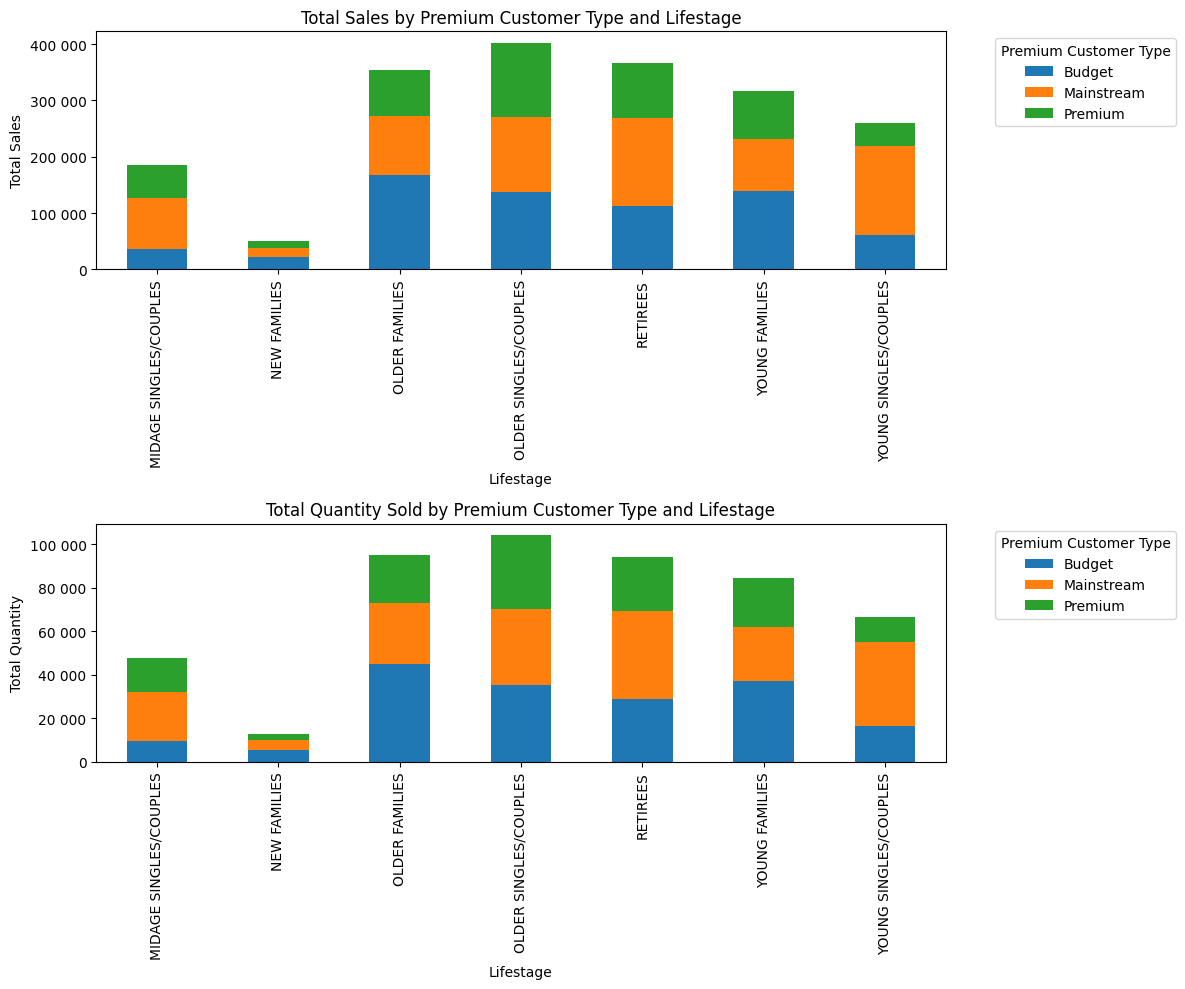


Pivot Table - Total Sales by Premium Customer Type and Lifestage:
PREMIUM_CUSTOMER           Budget  Mainstream    Premium
LIFESTAGE                                               
MIDAGE SINGLES/COUPLES   35514.80    90803.85   58432.65
NEW FAMILIES             21928.45    17013.90   11491.10
OLDER FAMILIES          168363.25   103445.55   81958.40
OLDER SINGLES/COUPLES   136769.80   133393.80  132263.15
RETIREES                113147.80   155677.05   97646.05
YOUNG FAMILIES          139345.85    92788.75   84025.50
YOUNG SINGLES/COUPLES    61141.60   157621.60   41642.10

Pivot Table - Total Quantity by Premium Customer Type and Lifestage:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    9496       22699    15526
NEW FAMILIES              5571        4319     2957
OLDER FAMILIES           45065       27756    22171
OLDER SINGLES/COUPLES    35220       34997    33986
RETIREES                 28764       4

In [23]:
# Customer segments deep dive

# Create pivot tables for sales and quantity by lifestage and premium segments
sales_pivot = pd.pivot_table(data=df, 
                           values='TOT_SALES',
                           index='LIFESTAGE',
                           columns='PREMIUM_CUSTOMER', 
                           aggfunc='sum')

qty_pivot = pd.pivot_table(data=df,
                          values='PROD_QTY',
                          index='LIFESTAGE',
                          columns='PREMIUM_CUSTOMER',
                          aggfunc='sum')

# Create stacked bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sales_pivot.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Total Sales by Premium Customer Type and Lifestage')
ax1.set_xlabel('Lifestage')
ax1.set_ylabel('Total Sales')
ax1.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.yaxis.set_major_formatter(FuncFormatter(format_thousands))

qty_pivot.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Total Quantity Sold by Premium Customer Type and Lifestage')
ax2.set_xlabel('Lifestage')
ax2.set_ylabel('Total Quantity')
ax2.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.tight_layout()
plt.show()

# Display the pivot tables
print("\nPivot Table - Total Sales by Premium Customer Type and Lifestage:")
print(sales_pivot)
print("\nPivot Table - Total Quantity by Premium Customer Type and Lifestage:")
print(qty_pivot)


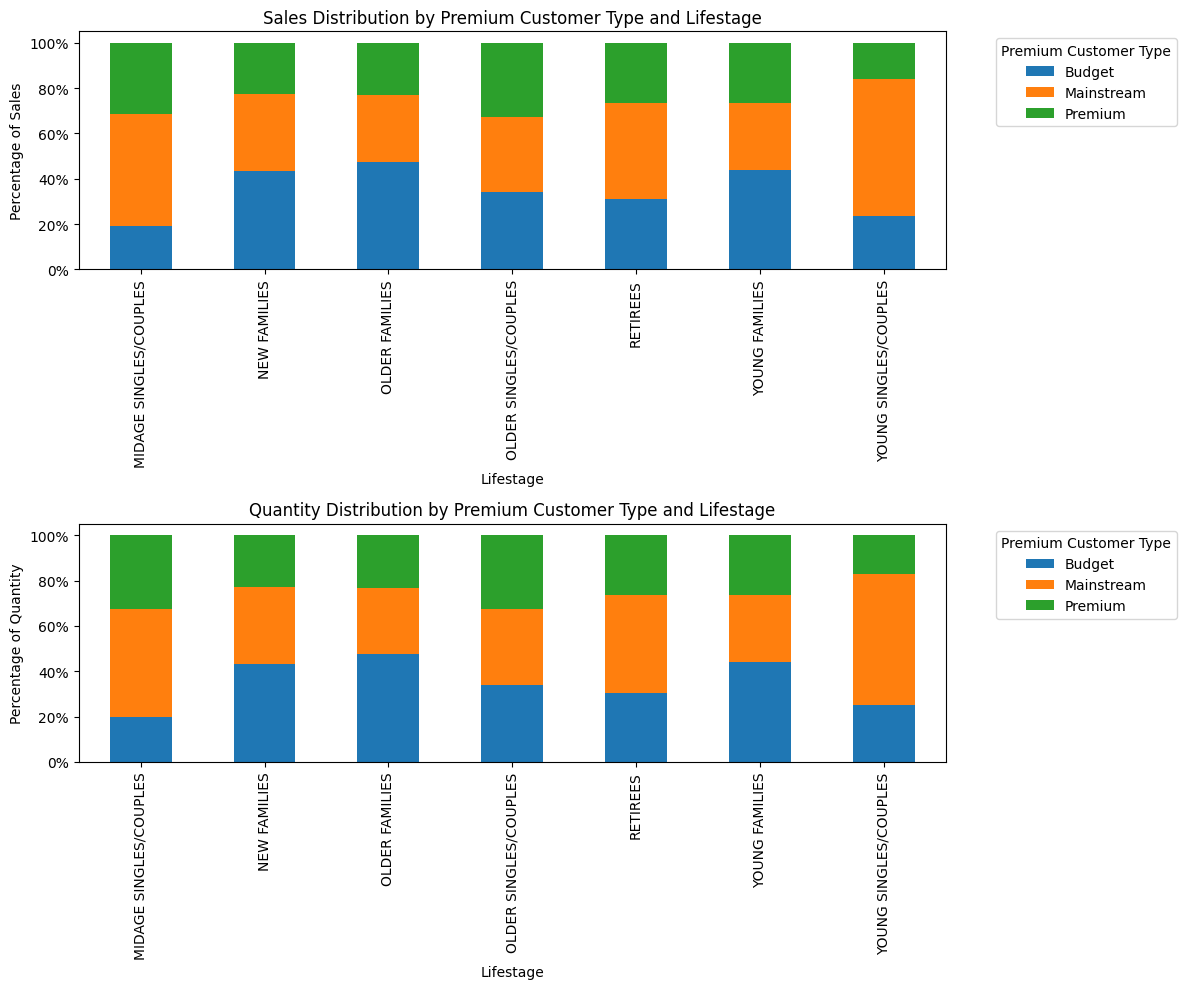


Pivot Table - Sales Distribution (%) by Premium Customer Type and Lifestage:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    19.2        49.1     31.6
NEW FAMILIES              43.5        33.7     22.8
OLDER FAMILIES            47.6        29.2     23.2
OLDER SINGLES/COUPLES     34.0        33.1     32.9
RETIREES                  30.9        42.5     26.6
YOUNG FAMILIES            44.1        29.3     26.6
YOUNG SINGLES/COUPLES     23.5        60.5     16.0

Pivot Table - Quantity Distribution (%) by Premium Customer Type and Lifestage:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    19.9        47.6     32.5
NEW FAMILIES              43.4        33.6     23.0
OLDER FAMILIES            47.4        29.2     23.3
OLDER SINGLES/COUPLES     33.8        33.6     32.6
RETIREES                  30.5        43.0     26.4
YOUNG FAM

In [45]:
# Customer segments deep dive

# Create pivot tables for sales and quantity by lifestage and premium segments
sales_pivot = pd.pivot_table(data=df, 
                           values='TOT_SALES',
                           index='LIFESTAGE',
                           columns='PREMIUM_CUSTOMER', 
                           aggfunc='sum')

qty_pivot = pd.pivot_table(data=df,
                          values='PROD_QTY',
                          index='LIFESTAGE',
                          columns='PREMIUM_CUSTOMER',
                          aggfunc='sum')

# Convert to percentages
sales_pivot_pct = sales_pivot.div(sales_pivot.sum(axis=1), axis=0) * 100
qty_pivot_pct = qty_pivot.div(qty_pivot.sum(axis=1), axis=0) * 100

# Create stacked bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sales_pivot_pct.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Sales Distribution by Premium Customer Type and Lifestage')
ax1.set_xlabel('Lifestage')
ax1.set_ylabel('Percentage of Sales')
ax1.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x)}%'))

qty_pivot_pct.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Quantity Distribution by Premium Customer Type and Lifestage')
ax2.set_xlabel('Lifestage')
ax2.set_ylabel('Percentage of Quantity')
ax2.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x)}%'))

plt.tight_layout()
plt.show()

# Display the pivot tables
print("\nPivot Table - Sales Distribution (%) by Premium Customer Type and Lifestage:")
print(sales_pivot_pct.round(1))
print("\nPivot Table - Quantity Distribution (%) by Premium Customer Type and Lifestage:")
print(qty_pivot_pct.round(1))


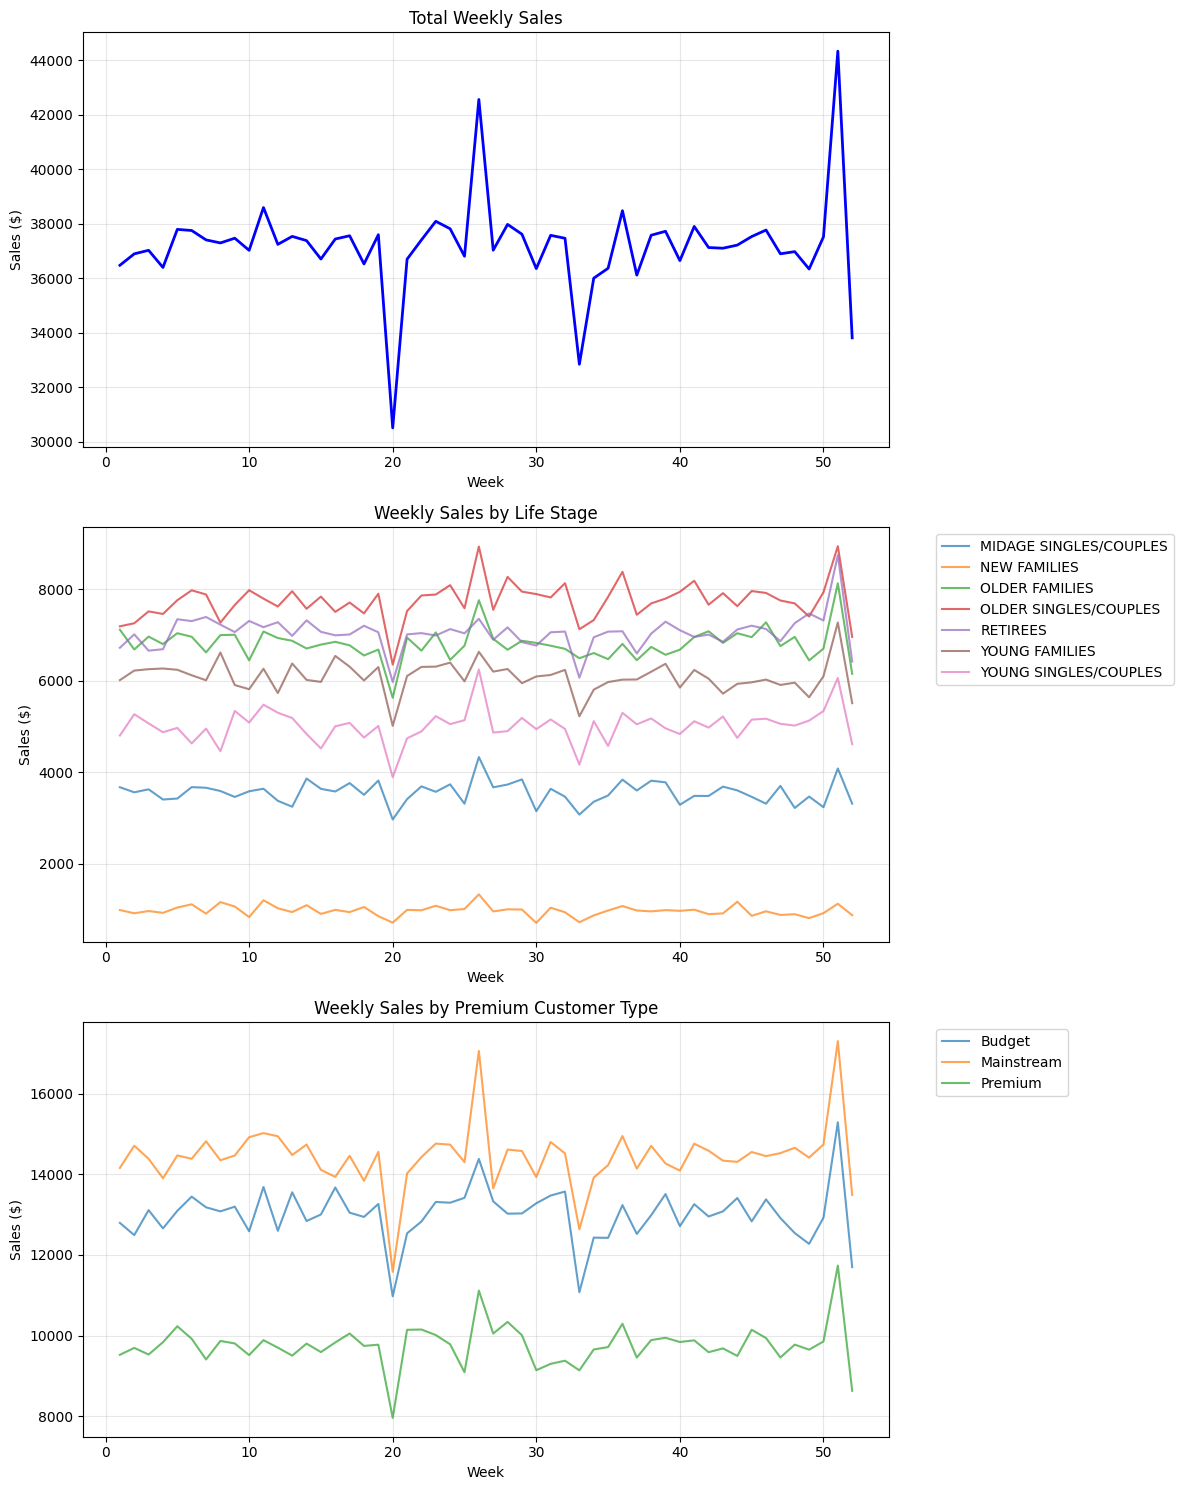

In [31]:
# Calculate weekly sales for different groupings
weekly_data = df.groupby('WEEK')['TOT_SALES'].sum().reset_index()
weekly_lifestage = df.groupby(['WEEK', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()
weekly_premium = df.groupby(['WEEK', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# First subplot - Total Sales
ax1.plot(weekly_data['WEEK'], weekly_data['TOT_SALES'], 
         linewidth=2, color='blue')
ax1.set_title('Total Weekly Sales')
ax1.set_xlabel('Week')
ax1.set_ylabel('Sales ($)')
ax1.grid(True, alpha=0.3)

# Second subplot - Sales by Lifestage
for lifestage in weekly_lifestage['LIFESTAGE'].unique():
    data = weekly_lifestage[weekly_lifestage['LIFESTAGE'] == lifestage]
    ax2.plot(data['WEEK'], data['TOT_SALES'], 
             label=lifestage, alpha=0.7)
ax2.set_title('Weekly Sales by Life Stage')
ax2.set_xlabel('Week')
ax2.set_ylabel('Sales ($)')
ax2.legend(bbox_to_anchor=(1.05, 1))
ax2.grid(True, alpha=0.3)

# Third subplot - Sales by Premium Customer Type
for premium in weekly_premium['PREMIUM_CUSTOMER'].unique():
    data = weekly_premium[weekly_premium['PREMIUM_CUSTOMER'] == premium]
    ax3.plot(data['WEEK'], data['TOT_SALES'],
             label=premium, alpha=0.7)
ax3.set_title('Weekly Sales by Premium Customer Type')
ax3.set_xlabel('Week') 
ax3.set_ylabel('Sales ($)')
ax3.legend(bbox_to_anchor=(1.05, 1))
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


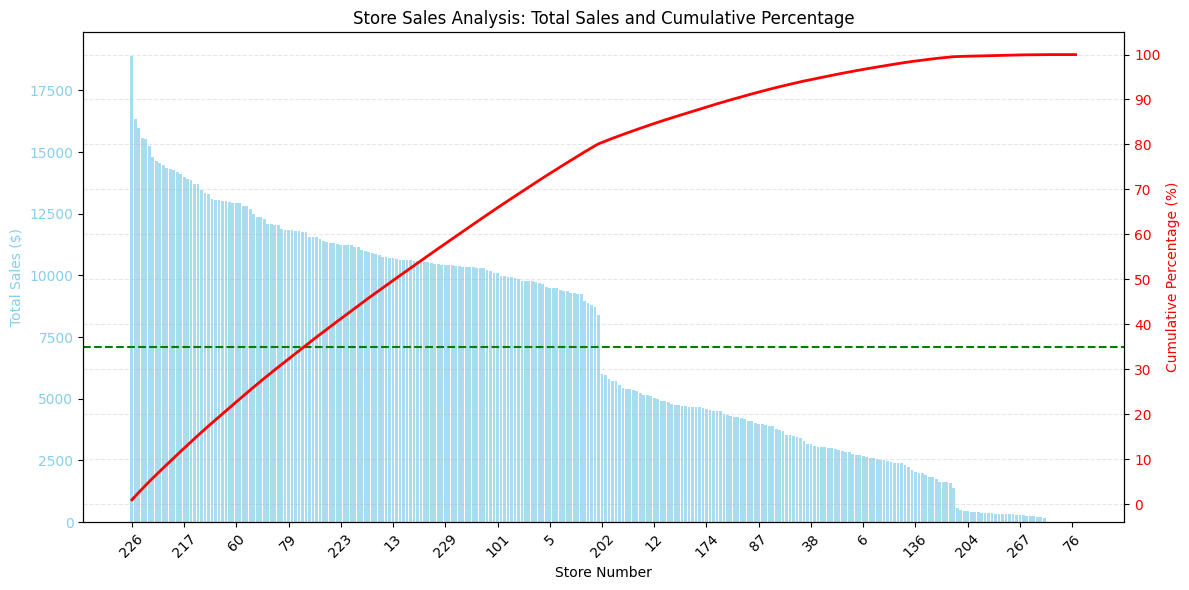


Store Sales Analysis:
--------------------
 STORE_NBR  TOT_SALES  Gross Sales %  Cumulative %
       226   18905.45           0.98          0.98
        88   16333.25           0.84          1.82
       165   15973.75           0.83          2.65
        40   15559.50           0.80          3.45
       237   15539.50           0.80          4.25
        58   15251.45           0.79          5.04
       199   14797.00           0.76          5.80
         4   14647.65           0.76          6.56
       203   14551.60           0.75          7.31
        26   14469.30           0.75          8.06
        81   14361.95           0.74          8.80
       201   14298.70           0.74          9.54
       130   14289.65           0.74         10.28
        72   14204.40           0.73         11.01
       181   14108.45           0.73         11.74
       217   13993.60           0.72         12.46
        95   13915.50           0.72         13.18
       261   13859.75           0.72  

In [44]:
# Create pivot table of store sales and percentages
store_pivot = pd.pivot_table(df,
                           values='TOT_SALES',
                           index='STORE_NBR',
                           aggfunc='sum').reset_index()

# Sort by total sales descending
store_pivot = store_pivot.sort_values('TOT_SALES', ascending=False)
# Create ordered store numbers for x-axis
ordered_stores = store_pivot['STORE_NBR'].tolist()

# Calculate percentage of total sales
total_sales = store_pivot['TOT_SALES'].sum()
store_pivot['Gross Sales %'] = (store_pivot['TOT_SALES'] / total_sales * 100).round(2)

# Calculate cumulative percentage
store_pivot['Cumulative %'] = store_pivot['Gross Sales %'].cumsum().round(2)

# Calculate mean gross sales percentage
mean_gross_sales = store_pivot['Gross Sales %'].mean()

# Create figure and axis with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot bar chart for total sales using ordered store numbers
x = range(len(ordered_stores))
bars = ax1.bar(x, store_pivot['TOT_SALES'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Store Number')
ax1.set_ylabel('Total Sales ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Show only every 15th store number on x-axis
show_every_n = 15
ax1.set_xticks(x[::show_every_n])
ax1.set_xticklabels(ordered_stores[::show_every_n], rotation=45)

# Plot line for cumulative percentage using ordered store numbers
line = ax2.plot(x, store_pivot['Cumulative %'], 
                color='red', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal grid lines at 10% intervals
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))
ax2.grid(True, axis='y', linestyle='--', alpha=0.3)

# Add horizontal line for mean gross sales percentage
ax1.axhline(y=mean_gross_sales*total_sales/100, color='green', linestyle='--', 
            label=f'Mean Gross Sales %: {mean_gross_sales:.2f}%')

plt.title('Store Sales Analysis: Total Sales and Cumulative Percentage')
plt.tight_layout()
plt.show()

# Display the pivot table
print("\nStore Sales Analysis:")
print("--------------------")
print(store_pivot.to_string(index=False))
